In [5]:
import vrep
import time
import numpy as np
from numpy import cos
from numpy import sin
from copy import copy

# for plotting
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt

In [6]:
# returns joint angles for a given foot position
def leg_IK(x,y,z):
    theta1 = atan(x/abs(y))
    
    theta2 = abs(atan(((x^2 + y^2)^(1/2) - 0.051496976497310442688615239603678)/z)) + \
             acos((6.9078370030605173735242143743271*(((x^2 + y^2)^(1/2) - 0.051496976497310442688615239603678)^2 + \
             z^2 - 0.0083358815796936158726282428688137))/(((x^2 + y^2)^(1/2) - \
             0.051496976497310442688615239603678)^2 + z^2)^(1/2)) - 1.5707963267948966192313216916398
    
    theta3 = acos(1.115463010227933919641721202415 - 59.288794418631241235969768311301*z^2 - \
             59.288794418631241235969768311301*((x^2 + y^2)^(1/2) - 0.051496976497310442688615239603678)^2)

# rotates a vector about z
def rotato(i,vector):
     phi = np.pi/3
     rotm = np.array([[cos(i*phi),sin(i*phi),0],[-sin(i*phi),cos(i*phi),0],[0,0,1]])
     return np.transpose(np.matmul(rotm,np.transpose(vector)))

In [16]:
# Constants
z_nom = 0.08 #nominal body height off the ground
center = np.array([ 0. , -0.11 , -z_nom]) #foot center position
# theta_center = np.array([0,-0.52359878,2.0943951]) #IK of foot center (antiquated)
radius_max = 0.04

In [7]:
# inputs and constants
vel = np.array([1,0,0])

# initialize the matrix of step coordinates
coords = np.array([[center for i in range(4)]for j in range(6)])
coord_delta = copy(vel)*radius_max
coord_delta[2] = 0
# forward = center+coord_delta
# backward = center-coord_delta

for i in range(6):
    rot_delta = rotato(i,coord_delta)
    pt1 = center+rot_delta
    pt2 = copy(pt1)
    pt2[2] = pt2[2]+.03
    pt4 = center-rot_delta
    pt3 = copy(pt4)
    pt3[2] = pt3[2]+.03
    coords[i]=[pt1,pt2,pt3,pt4]
    
print(coords[0,0,:])
coords

[ 0.04 -0.11 -0.08]


array([[[ 0.04      , -0.11      , -0.08      ],
        [ 0.04      , -0.11      , -0.05      ],
        [-0.04      , -0.11      , -0.05      ],
        [-0.04      , -0.11      , -0.08      ]],

       [[ 0.02      , -0.14464102, -0.08      ],
        [ 0.02      , -0.14464102, -0.05      ],
        [-0.02      , -0.07535898, -0.05      ],
        [-0.02      , -0.07535898, -0.08      ]],

       [[-0.02      , -0.14464102, -0.08      ],
        [-0.02      , -0.14464102, -0.05      ],
        [ 0.02      , -0.07535898, -0.05      ],
        [ 0.02      , -0.07535898, -0.08      ]],

       [[-0.04      , -0.11      , -0.08      ],
        [-0.04      , -0.11      , -0.05      ],
        [ 0.04      , -0.11      , -0.05      ],
        [ 0.04      , -0.11      , -0.08      ]],

       [[-0.02      , -0.07535898, -0.08      ],
        [-0.02      , -0.07535898, -0.05      ],
        [ 0.02      , -0.14464102, -0.05      ],
        [ 0.02      , -0.14464102, -0.08      ]],

       [[ 

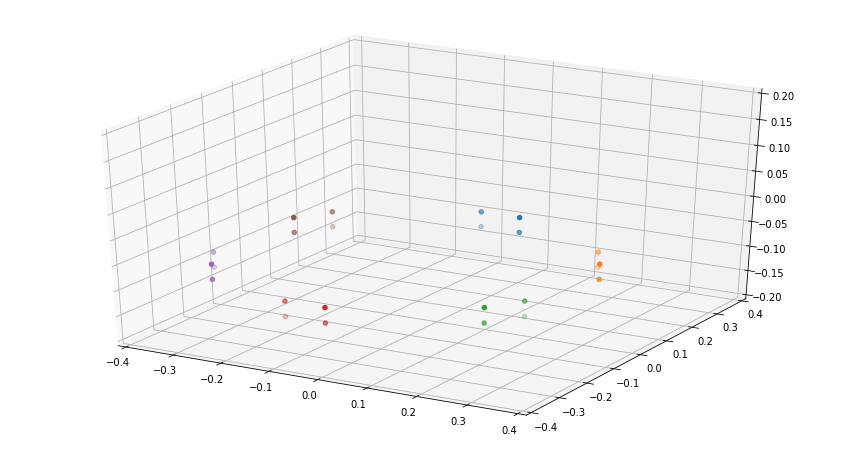

In [18]:
offset = 0.3403902131463673
fig = plt.figure(figsize=[15,8])
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-.4,.4)
ax.set_ylim(-.4,.4)
ax.set_zlim(-.2,.2)
circle = plt.Circle((offset*sin(1*np.pi/3), offset*cos(1*np.pi/3)), radius_max, color='r')
ax.add_artist(circle)
for i in range(6):
    ax.scatter((coords[i,:,0]+offset*sin(i*np.pi/3)),(coords[i,:,1]+offset*cos(i*np.pi/3)),coords[i,:,2])
    
# ax.scatter(coords[0,1,0],coords[0,1,1],coords[0,1,2])
# ax.scatter(coords[0,2,0],coords[0,2,1],coords[0,2,2])
# ax.scatter(coords[0,3,0],coords[0,3,1],coords[0,3,2])